In [71]:
import kagglehub

path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\yarra\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [72]:
import pandas as pd

In [73]:
books =pd.read_csv(path + "/books.csv")

In [74]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [5]:
import dask.dataframe as dd



# Load CSV with Dask (auto dtype detection)
df = dd.read_csv(path + "/books.csv", assume_missing=True)

# Compute column statistics
print(df.dtypes)  # Check column data types
print(df.describe().compute())  # Get column statistics


isbn13                    float64
isbn10            string[pyarrow]
title             string[pyarrow]
subtitle          string[pyarrow]
authors           string[pyarrow]
categories        string[pyarrow]
thumbnail         string[pyarrow]
description       string[pyarrow]
published_year            float64
average_rating            float64
num_pages                 float64
ratings_count             float64
dtype: object
             isbn13  published_year  average_rating    num_pages  \
count  6.810000e+03     6804.000000     6767.000000  6767.000000   
mean   9.780677e+12     1998.630364        3.933284   348.181026   
std    6.068911e+08       10.484257        0.331352   242.376783   
min    9.780002e+12     1853.000000        0.000000     0.000000   
25%    9.780330e+12     1996.000000        3.770000   208.000000   
50%    9.780553e+12     2002.000000        3.960000   304.000000   
75%    9.780810e+12     2005.000000        4.130000   420.000000   
max    9.789042e+12     2019.00000

In [6]:
# Compute statistics
unique_values = df.nunique().compute()
total_count = df.count().compute()
missing_values = df.isnull().sum().compute()

# Top Value and Top Frequency per column (for categorical columns)
top_values = {}
top_freq = {}

for column in df.columns:
    if df[column].dtype == 'O':  # Only for object (categorical) columns
        value_counts = df[column].value_counts().compute()
        top_values[column] = value_counts.idxmax()  # Most frequent value
        top_freq[column] = value_counts.max()  # Frequency of the most frequent value

# Create a summary DataFrame

summary_df = pd.DataFrame({
    "Unique Values": unique_values,
    "Total Count": total_count,
    "Missing Values": missing_values
})

# Add the top value and top frequency columns
summary_df["Top Value"] = summary_df.index.map(top_values)
summary_df["Top Frequency"] = summary_df.index.map(top_freq)

# Print the summary statistics
print(summary_df)


                Unique Values  Total Count  Missing Values  Top Value  \
isbn13                   6810         6810               0        NaN   
isbn10                   6810         6810               0        NaN   
title                    6398         6810               0        NaN   
subtitle                 2009         2381            4429        NaN   
authors                  3780         6738              72        NaN   
categories                567         6711              99        NaN   
thumbnail                6481         6481             329        NaN   
description              6474         6548             262        NaN   
published_year             94         6804               6        NaN   
average_rating            200         6767              43        NaN   
num_pages                 915         6767              43        NaN   
ratings_count            3881         6767              43        NaN   

                Top Frequency  
isbn13            

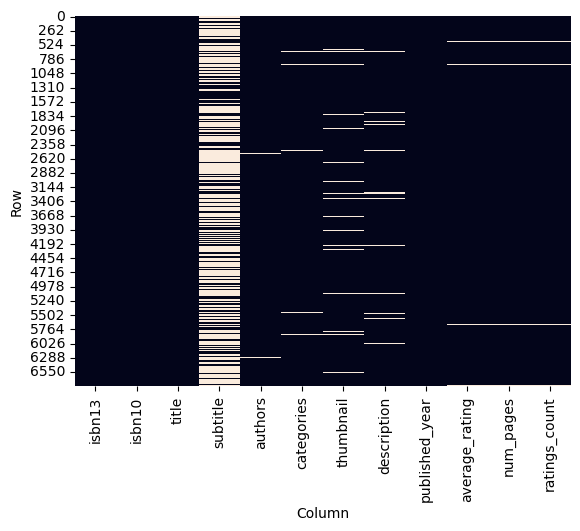

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

ax =plt.axes()
sns.heatmap(books.isna(), cbar=False, ax=ax)    
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

In [8]:
import numpy as np

books["missing_values"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2024 - books["published_year"]

<Axes: >

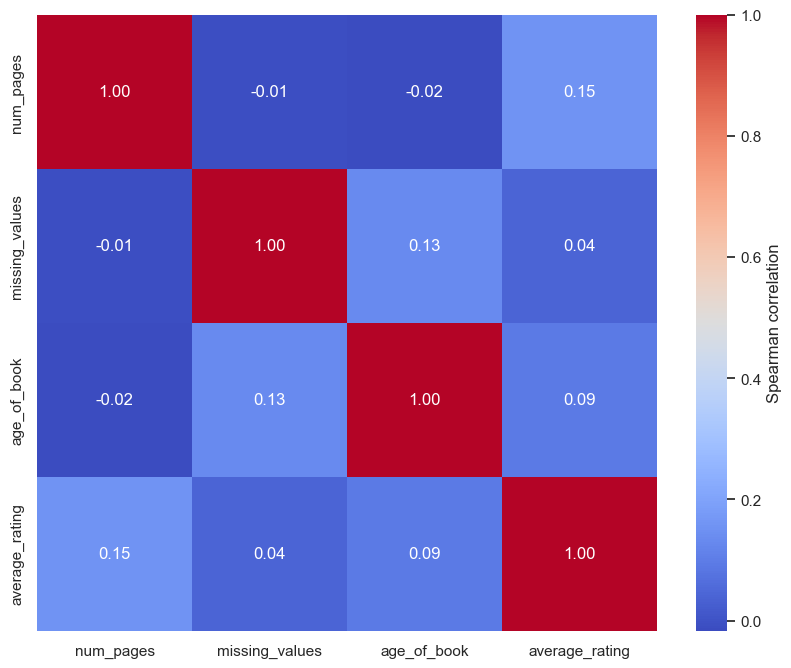

In [9]:
from statistics import correlation

from seaborn import heatmap

columns_of_interest = ["num_pages", "missing_values", "age_of_book","average_rating"]

correlation_matrix = books[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(10, 8))
heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",cbar_kws={"label":"Spearman correlation"})

In [10]:
book_missing=books[~(books["description"].isna()) &
      ~(books["num_pages"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["published_year"].isna()) ]

In [11]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_values,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0


In [12]:
book_missing["categories"].value_counts().reset_index().sort_values("count",ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [13]:
book_missing[:10]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_values,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,0,47.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,26.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,30.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,42.0


In [14]:
book_missing.loc[:, 'words_in_description'] = book_missing['description'].str.split().str.len()


C:\Users\yarra\AppData\Local\Temp\ipykernel_9580\4089566939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing.loc[:, 'words_in_description'] = book_missing['description'].str.split().str.len()


In [15]:
book_missing[:10]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_values,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,0,47.0,1
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,26.0,80
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,30.0,160
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,42.0,30


In [16]:
book_missing.loc[book_missing["words_in_description"].between(1,4),"description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [17]:
book_missing.loc[book_missing["words_in_description"].between(5,14),"description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [18]:
book_missing.loc[book_missing["words_in_description"].between(15,24),"description"]

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [19]:
book_missing.loc[book_missing["words_in_description"].between(25,34),"description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [20]:
book_missing_25_words = book_missing.loc[book_missing["words_in_description"]>=25]

In [21]:
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_values,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174


In [22]:
book_missing_25_words.loc[:, 'title_and_subtitle'] = np.where(
    book_missing_25_words["subtitle"].isna(),
    book_missing_25_words["title"],
    book_missing_25_words[["title", "subtitle"]].astype(str).agg(":".join, axis=1)
)


C:\Users\yarra\AppData\Local\Temp\ipykernel_9580\3728455054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words.loc[:, 'title_and_subtitle'] = np.where(


In [23]:
book_missing_25_words[:10]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_values,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web:A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,26.0,80,Empires of the Monsoon:A History of the Indian...
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,30.0,160,The Gap Into Madness:Chaos and Order
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,42.0,30,Master of the Game
12,9780006482079,0006482074,Warhost of Vastmark,NaN,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,0,29.0,136,Warhost of Vastmark
13,9780006483014,0006483011,The Once and Future King,NaN,Terence Hanbury White,Arthurian romances,http://books.google.com/books/content?id=Jx6Bv...,An omnibus volume of the author's complete sto...,1996.0,4.04,823.0,2805.0,0,28.0,46,The Once and Future King


In [24]:
(
    book_missing_25_words
    .drop(["subtitle", "missing_values","age_of_book","words_in_description"], axis=1)
    .to_csv("books_cleaned.csv", index=False)
)

In [25]:
from dotenv import load_dotenv

load_dotenv()

True

In [26]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma #vector database

In [27]:
import pandas as pd

books=pd.read_csv("books_cleaned.csv")

In [28]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web:A Novel
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that:Talks with Sri Nisargadatta Maharaj


In [29]:
books["tagged_description"] = books.apply(lambda row: f"{row['isbn13']} {row['description']}", axis=1)


In [30]:
books["tagged_description"]

0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
2       9780006178736 A memorable, mesmerizing heroine...
3       9780006280897 Lewis' work on the nature of lov...
4       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
5192    9788172235222 On A Train Journey Home To North...
5193    9788173031014 This book tells the tale of a ma...
5194    9788179921623 Wisdom to Create a Life of Passi...
5195    9788185300535 This collection of the timeless ...
5196    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5197, dtype: object

In [31]:
books["tagged_description"].to_csv("tagged_description.txt", sep="\n", index=False, header=False)

In [32]:

raw_documents = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=0,chunk_overlap=0,separator="\n")
documents = text_splitter.split_documents(raw_documents)

Created a chunk of size 1168, which is longer than the specified 0


Created a chunk of size 1214, which is longer than the specified 0
Created a chunk of size 373, which is longer than the specified 0
Created a chunk of size 309, which is longer than the specified 0
Created a chunk of size 483, which is longer than the specified 0
Created a chunk of size 482, which is longer than the specified 0
Created a chunk of size 960, which is longer than the specified 0
Created a chunk of size 188, which is longer than the specified 0
Created a chunk of size 843, which is longer than the specified 0
Created a chunk of size 296, which is longer than the specified 0
Created a chunk of size 197, which is longer than the specified 0
Created a chunk of size 881, which is longer than the specified 0
Created a chunk of size 1088, which is longer than the specified 0
Created a chunk of size 1189, which is longer than the specified 0
Created a chunk of size 304, which is longer than the specified 0
Created a chunk of size 270, which is longer than the specified 0
Created

In [33]:
documents[0]

Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gi

In [34]:
db_books =Chroma.from_documents(documents, embedding=OpenAIEmbeddings())

In [35]:
query ="A book to teach childern about nature"
docs =db_books.similarity_search(query,k=10)
docs

[Document(id='de202b69-3189-4020-91e9-48e07d9aa576', metadata={'source': 'tagged_description.txt'}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(id='13b4116a-6f92-4ad3-971f-e4f3acf88317', metadata={'source': 'tagged_description.txt'}, page_content="9780786808380 Introduce your babies to birds, cats, dogs, and babies through fine art, illustration, and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from simple child's drawings and abstract art to playful photos. A brief text accompanies each image, introducing the baby to some basic -- and sometimes playful -- information about the subjects."),
 Document(id='f5b27c02-3a0b-479b-b2a5-158337a9c590', metadata={'source': '

In [36]:
books[books["isbn13"] == int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...


In [37]:
def retrieve_semantic_recommendations(
        query:str,
        top_k:int=10,
)->pd.DataFrame:
    recs = db_books.similarity_search(query,k=50)

    books_list=[]

    for i in range(0, len(recs)):
        books_list +=[int(recs[i].page_content.strip('"').split()[0])]

    return books[books["isbn13"].isin(books_list)].head(top_k)

In [38]:
retrieve_semantic_recommendations("A book to teach childern about nature")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
31,9780007105045,0007105045,Tree and Leaf,John Ronald Reuel Tolkien,Literary Collections,http://books.google.com/books/content?id=aPb_A...,"""The two works 'On fairy-stories' and 'Leaf by...",2001.0,4.09,176.0,2245.0,Tree and Leaf:The Homecoming of Beorhtnoth : B...,"9780007105045 ""The two works 'On fairy-stories..."
143,9780060546571,0060546573,Three Rotten Eggs,Gregory Maguire,Juvenile Fiction,http://books.google.com/books/content?id=t2pWl...,The students of Miss Earth's class in rural Ve...,2005.0,3.74,240.0,76.0,Three Rotten Eggs,9780060546571 The students of Miss Earth's cla...
429,9780064434980,0064434982,The Deer in the Wood,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=V7YDW...,Even the youngest child can enjoy a special ad...,1999.0,4.17,32.0,302.0,The Deer in the Wood,9780064434980 Even the youngest child can enjo...
442,9780067575208,006757520X,The Sense of Wonder,Rachel Carson,Nature,http://books.google.com/books/content?id=Zee5S...,"First published more than three decades ago, t...",1998.0,4.39,112.0,1160.0,The Sense of Wonder,9780067575208 First published more than three ...
692,9780140448009,0140448004,Three Tales,Gustave Flaubert;Roger Whitehouse;Geoffrey Wall,Fiction,http://books.google.com/books/content?id=XFzga...,Features short fiction by the French naturalis...,2005.0,3.71,110.0,3050.0,Three Tales,9780140448009 Features short fiction by the Fr...
707,9780140568196,0140568190,The Giraffe and the Pelly and Me,Roald Dahl;Quentin Blake,Candy,http://books.google.com/books/content?id=J7FdI...,"A Dahl story in which the giraffe, the pelican...",2001.0,3.81,32.0,16265.0,The Giraffe and the Pelly and Me,9780140568196 A Dahl story in which the giraff...
711,9780140621624,0140621628,The Railway Children,E. Nesbit,Fiction,http://books.google.com/books/content?id=fFesd...,"When their father is sent away to prison, thre...",1995.0,4.00,212.0,178.0,The Railway Children,9780140621624 When their father is sent away t...
763,9780141186078,0141186070,The Log from the Sea of Cortez,John Steinbeck,Biography & Autobiography,http://books.google.com/books/content?id=9CrIf...,This light-hearted journal tells of John Stein...,2001.0,3.84,288.0,3226.0,The Log from the Sea of Cortez,9780141186078 This light-hearted journal tells...
812,9780142302279,0142302279,Dirty Beasts,Roald Dahl,Juvenile Nonfiction,NaN,Poems tell the stories of a smart pig who outw...,2002.0,4.02,32.0,3953.0,Dirty Beasts,9780142302279 Poems tell the stories of a smar...
855,9780143037392,0143037390,The Read-aloud Handbook,Jim Trelease,Language Arts & Disciplines,http://books.google.com/books/content?id=B2_yU...,Explains the importance of reading aloud to ch...,2006.0,4.40,432.0,4122.0,The Read-aloud Handbook,9780143037392 Explains the importance of readi...


In [39]:
books = pd.read_csv("books_cleaned.csv")

In [40]:
books["categories"].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Conspiracies,1
475,Brothers and sisters,1
476,Rock musicians,1
477,Community life,1


In [41]:
books["categories"].value_counts().reset_index().rename(columns={"index":"category","categories":"count"})

,count,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Conspiracies,1
475,Brothers and sisters,1
476,Rock musicians,1
477,Community life,1


In [42]:
books[books["categories"] == "Juvenile Fiction" ]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express
79,9780020442608,0020442602,The voyage of the Dawn Treader,Clive Staples Lewis,Juvenile Fiction,http://books.google.com/books/content?id=fDD3C...,"The ""Dawn Treader"" is the first ship Narnia ha...",1970.0,4.09,216.0,2869.0,The voyage of the Dawn Treader
85,9780030547744,0030547741,Where the Red Fern Grows,Wilson Rawls,Juvenile Fiction,http://books.google.com/books/content?id=IHpRw...,A young boy living in the Ozarks achieves his ...,2000.0,4.37,288.0,95.0,Where the Red Fern Grows:The Story of Two Dogs...
86,9780060000141,0060000147,Poppy's Return,Avi,Juvenile Fiction,http://books.google.com/books/content?id=XbcMJ...,"There's trouble at Gray House, the girlhood ho...",2006.0,3.99,256.0,1086.0,Poppy's Return
87,9780060001537,0060001534,Diary of a Spider,Doreen Cronin,Juvenile Fiction,http://books.google.com/books/content?id=UWvZo...,This is the diary ... of a spider. But don't b...,2005.0,4.25,40.0,7903.0,Diary of a Spider
...,...,...,...,...,...,...,...,...,...,...,...,...
4845,9781590385814,1590385810,Fablehaven,Brandon Mull,Juvenile Fiction,http://books.google.com/books/content?id=tbVIP...,When Kendra and Seth go to stay at their grand...,2006.0,4.09,351.0,111896.0,Fablehaven
4930,9781596792500,1596792507,Sherlock Holmes and the Case of the Hound of t...,Arthur Conan Doyle;Malvina G. Vogel,Juvenile Fiction,http://books.google.com/books/content?id=EWgWP...,Sherlock Holmes and Dr. Watson travel to the b...,2005.0,4.51,237.0,28.0,Sherlock Holmes and the Case of the Hound of t...
4942,9781599900056,159990005X,The Drift House,Dale Peck,Juvenile Fiction,http://books.google.com/books/content?id=kbwPY...,Sent to stay with their uncle in a ship-like h...,2006.0,3.64,437.0,595.0,The Drift House:The First Voyage
5010,9781844580514,1844580512,Attack of the Jaguar,M. A. Harvey,Juvenile Fiction,http://books.google.com/books/content?id=3HUdt...,This training manual for operatives of Xtreme ...,2004.0,3.40,125.0,4.0,Attack of the Jaguar


In [43]:
books[books["categories"] == "Juvenile Fiction" ]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express
79,9780020442608,0020442602,The voyage of the Dawn Treader,Clive Staples Lewis,Juvenile Fiction,http://books.google.com/books/content?id=fDD3C...,"The ""Dawn Treader"" is the first ship Narnia ha...",1970.0,4.09,216.0,2869.0,The voyage of the Dawn Treader
85,9780030547744,0030547741,Where the Red Fern Grows,Wilson Rawls,Juvenile Fiction,http://books.google.com/books/content?id=IHpRw...,A young boy living in the Ozarks achieves his ...,2000.0,4.37,288.0,95.0,Where the Red Fern Grows:The Story of Two Dogs...
86,9780060000141,0060000147,Poppy's Return,Avi,Juvenile Fiction,http://books.google.com/books/content?id=XbcMJ...,"There's trouble at Gray House, the girlhood ho...",2006.0,3.99,256.0,1086.0,Poppy's Return
87,9780060001537,0060001534,Diary of a Spider,Doreen Cronin,Juvenile Fiction,http://books.google.com/books/content?id=UWvZo...,This is the diary ... of a spider. But don't b...,2005.0,4.25,40.0,7903.0,Diary of a Spider
...,...,...,...,...,...,...,...,...,...,...,...,...
4845,9781590385814,1590385810,Fablehaven,Brandon Mull,Juvenile Fiction,http://books.google.com/books/content?id=tbVIP...,When Kendra and Seth go to stay at their grand...,2006.0,4.09,351.0,111896.0,Fablehaven
4930,9781596792500,1596792507,Sherlock Holmes and the Case of the Hound of t...,Arthur Conan Doyle;Malvina G. Vogel,Juvenile Fiction,http://books.google.com/books/content?id=EWgWP...,Sherlock Holmes and Dr. Watson travel to the b...,2005.0,4.51,237.0,28.0,Sherlock Holmes and the Case of the Hound of t...
4942,9781599900056,159990005X,The Drift House,Dale Peck,Juvenile Fiction,http://books.google.com/books/content?id=kbwPY...,Sent to stay with their uncle in a ship-like h...,2006.0,3.64,437.0,595.0,The Drift House:The First Voyage
5010,9781844580514,1844580512,Attack of the Jaguar,M. A. Harvey,Juvenile Fiction,http://books.google.com/books/content?id=3HUdt...,This training manual for operatives of Xtreme ...,2004.0,3.40,125.0,4.0,Attack of the Jaguar


In [44]:
category_mapping ={
    'Fiction': 'Fiction',
    'Juvenile Fiction': "Childern's Fiction",
    'Juvenile Nonfiction': "Childern's Nonfiction",
    'Biography & Autobiography': 'Nonfiction',
    'History': 'Nonfiction',
    'Literary Criticism': 'Nonfiction',
    'Philosphy': 'Nonfiction',
    'Religion': 'Nonfiction',
    'comics & Graphic Novels': 'Fiction',
    'Drama': 'Fiction',
    'Science': 'Nonfiction',
    'Poetry': 'Fiction'

}

books['simple_categories'] = books['categories'].map(category_mapping)

In [45]:
books[:10]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web:A Novel,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,NaN
5,9780006380832,0006380832,Empires of the Monsoon,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,Empires of the Monsoon:A History of the Indian...,NaN
6,9780006470229,000647022X,The Gap Into Madness,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,The Gap Into Madness:Chaos and Order,NaN
7,9780006472612,0006472613,Master of the Game,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,Master of the Game,NaN
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,Fiction
9,9780006483014,0006483011,The Once and Future King,Terence Hanbury White,Arthurian romances,http://books.google.com/books/content?id=Jx6Bv...,An omnibus volume of the author's complete sto...,1996.0,4.04,823.0,2805.0,The Once and Future King,NaN


In [46]:
books[~(books["simple_categories"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,Fiction
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,Fiction
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,Childern's Fiction
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,Taken at the Flood,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,9781933372198,1933372192,Amazing Disgrace,James Hamilton-Paterson,Fiction,http://books.google.com/books/content?id=s7jyA...,In this sequel to the popular Cooking with Fer...,2006.0,3.79,320.0,219.0,Amazing Disgrace,Fiction
5178,9781933648279,1933648279,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007.0,3.77,344.0,680.0,Night Has a Thousand Eyes,Fiction
5188,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,Coin Locker Babies,Fiction
5189,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",Fiction


In [47]:
import pip
from transformers import pipeline

fiction_categories = ["Fiction","Nonfiction"]

pipe = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=-1)

In [48]:
sequence = books.loc[books["simple_categories"]=="Fiction","description"].reset_index(drop=True)[0]

In [49]:
pipe(sequence, fiction_categories)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [50]:
max_index = np.argmax(pipe(sequence, fiction_categories)["scores"])

max_label = pipe(sequence, fiction_categories)["labels"][max_index]
max_label

'Fiction'

In [51]:
def generate_predictions(sequence,categories):
    predictions = pipe(sequence, categories)
    max_index = np.argmax(predictions["scores"])
    max_label = predictions["labels"][max_index]
    return max_label

In [52]:
from tqdm import tqdm

actual_cats=[]
predicted_cats=[]

for i in tqdm(range(0, 300)):
    sequence = books.loc[books['simple_categories']=='Fiction','description'].reset_index(drop=True)[i]
    predicted_cats+= [generate_predictions(sequence,fiction_categories)]
    actual_cats+=["Fiction"]

  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [10:25<00:00,  2.08s/it]


In [53]:
for i in tqdm(range(0, 300)):
    sequence = books.loc[books['simple_categories']=='Nonfiction','description'].reset_index(drop=True)[i]
    predicted_cats+= [generate_predictions(sequence,fiction_categories)]
    actual_cats+=["Nonfiction"]

100%|██████████| 300/300 [17:14<00:00,  3.45s/it]


In [54]:
predictions_df = pd.DataFrame({
    "actual_categories": actual_cats,
    "predicted_categories": predicted_cats
}) 

In [55]:
predictions_df.head(10)

,actual_categories,predicted_categories
0,Fiction,Fiction
1,Fiction,Fiction
2,Fiction,Fiction
3,Fiction,Nonfiction
4,Fiction,Fiction
5,Fiction,Fiction
6,Fiction,Fiction
7,Fiction,Fiction
8,Fiction,Fiction
9,Fiction,Fiction


In [56]:
predictions_df["correct_predictions"]=np.where(
    predictions_df["actual_categories"]==predictions_df["predicted_categories"],1,0
    )

In [57]:
predictions_df["correct_predictions"].sum()/len(predictions_df)

0.77

In [59]:
isbns=[]

predicted_cats =[]

missing_cats = books.loc[books["simple_categories"].isna(),["isbn13","description"]].reset_index(drop=True)

In [60]:
for i in tqdm(range(0, len(missing_cats))):
    sequence = missing_cats["description"][i]
    predicted_cats += [generate_predictions(sequence,fiction_categories)]
    isbns += [missing_cats["isbn13"][i]]

100%|██████████| 1687/1687 [1:05:40<00:00,  2.34s/it]  


In [62]:
missing_predictions_df = pd.DataFrame({"isbn13":isbns,"predicted_categories":predicted_cats})

In [63]:
missing_predictions_df

,isbn13,predicted_categories
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1682,9788171565641,Fiction
1683,9788172235222,Fiction
1684,9788173031014,Nonfiction
1685,9788179921623,Fiction


In [66]:
books = pd.merge(books,missing_predictions_df, on="isbn13", how="left")
books["simple_categories"] = np.where(books["simple_categories"].isna(),books["predicted_categories"],books["simple_categories"])
books = books.drop(columns = ["predicted_categories"])

In [68]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,simple_categories,predicted_categories_x,predicted_categories_y
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,Fiction,NaN,NaN
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web:A Novel,Fiction,Fiction,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,Fiction,NaN,NaN
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,Nonfiction,Nonfiction,Nonfiction
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,Nonfiction,Nonfiction,Nonfiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,Fiction,Fiction,Fiction
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,Nonfiction,Nonfiction,Nonfiction
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,Fiction,Fiction,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that:Talks with Sri Nisargadatta Maharaj,Nonfiction,Nonfiction,Nonfiction


In [69]:
books[books["categories"].str.lower().isin([
    "romance",
    "science fiction",
    "scific",
    "fantasy",
    "horror",
    "mystery",
    "thriller",
    "comedy",
    "crime",
    "historical",
    ])]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,simple_categories,predicted_categories_x,predicted_categories_y
24,9780006513087,0006513085,Gravity,Tess Gerritsen,Science fiction,http://books.google.com/books/content?id=KI66c...,Emma Watson a research physician has been trai...,2004.0,4.04,342.0,8024.0,Gravity,Nonfiction,Nonfiction,Nonfiction
475,9780099410355,0099410354,Traitor,Matthew Woodring Stover,Science fiction,http://books.google.com/books/content?id=VbICO...,"From the depths of catastrophe, a glimmer of h...",2002.0,4.00,320.0,6765.0,Traitor,Fiction,Fiction,Fiction
478,9780099422341,0099422344,Yeats is Dead!,Joseph O'Connor,Comedy,http://books.google.com/books/content?id=DrE3I...,"In aid of Amnesty International, this is a bri...",2002.0,3.39,298.0,34.0,Yeats is Dead!:A Novel by Fifteen Irish Writers,Fiction,Fiction,Fiction
491,9780099446729,0099446723,Blackwood Farm,Anne Rice,Horror,http://books.google.com/books/content?id=cIn8T...,"Lestat Is Back, Saviour And Demon, Presiding O...",2003.0,3.86,774.0,26145.0,Blackwood Farm,Fiction,Fiction,Fiction
1090,9780261102422,0261102427,The Silmarillion,John Ronald Reuel Tolkien,Fantasy,http://books.google.com/books/content?id=22ePu...,Tolkien's Silmarillion is the core work of the...,1999.0,3.91,384.0,253.0,The Silmarillion,Fiction,Fiction,Fiction
1435,9780340837955,0340837950,Stranger in a Strange Land,Robert A. Heinlein,Science fiction,http://books.google.com/books/content?id=ZQhiP...,"Epic, entertaining, Stranger in a Strange Land...",2005.0,3.92,672.0,563.0,Stranger in a Strange Land,Fiction,Fiction,Fiction
1439,9780345251220,0345251229,Visions from Nowhere,William Arrow,Science fiction,NaN,"The first novel in the series, ""Return to the ...",1976.0,3.23,183.0,10.0,Visions from Nowhere,Fiction,Fiction,Fiction
2845,9780575075597,0575075597,Replay,Ken Grimwood,Fantasy,http://books.google.com/books/content?id=9vmNP...,At forty-three Jeff Winston is tired of his lo...,2005.0,4.16,272.0,412.0,Replay,Fiction,Fiction,Fiction
2860,9780590254762,0590254766,"The lion, the witch and the wardrobe",Clive Staples Lewis,Fantasy,NaN,Four English school children enter the magic l...,1995.0,4.21,189.0,860.0,"The lion, the witch and the wardrobe",Nonfiction,Nonfiction,Nonfiction
3288,9780739423851,0739423851,Wizard's Castle,Diana Wynne Jones,Fantasy,http://books.google.com/books/content?id=hB7hA...,Howl's moving castle - Eldest of three sisters...,2002.0,4.44,376.0,439.0,Wizard's Castle,Fiction,Fiction,Fiction


In [70]:
books.to_csv("books_with_categories.csv",index=False)